# **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
df=pd.read_csv("/content/talking_data.csv")

In [ ]:
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [ ]:
df.tail()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0
99999,119349,14,1,15,401,2017-11-07 14:32:27,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
df.shape

(100000, 8)

In [ ]:
df.isnull().values.any()

True

In [ ]:
miss_val = df.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

# **2. Which column has maximum number of unique values present among all the available columns**

In [ ]:
print("Column Names:",df.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [ ]:
df['attributed_time'].value_counts()

2017-11-08 05:48:16    1
2017-11-09 14:30:54    1
2017-11-07 01:19:12    1
2017-11-09 13:32:51    1
2017-11-08 14:30:55    1
                      ..
2017-11-08 05:11:04    1
2017-11-07 15:48:34    1
2017-11-07 07:05:11    1
2017-11-08 09:09:41    1
2017-11-07 01:50:04    1
Name: attributed_time, Length: 227, dtype: int64

In [ ]:
df.drop(['attributed_time'],axis=1,inplace=True)

In [ ]:
df['ip'].value_counts()

5348      669
5314      616
73487     439
73516     399
53454     280
         ... 
125982      1
5153        1
177205      1
60478       1
92122       1
Name: ip, Length: 34857, dtype: int64

In [ ]:
df['ip'].unique()

array([ 87540, 105560, 101424, ..., 153487,  34029, 185961])

In [ ]:
df['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [ ]:
df['app'].unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

In [ ]:
df['device'].value_counts()

1       94338
2        4345
0         541
3032      371
3543      151
        ...  
420         1
37          1
549         1
2980        1
347         1
Name: device, Length: 100, dtype: int64

In [ ]:
df['device'].unique()

array([   1,    2, 3866,    0, 3032, 3543,    7,   40,  385,   56, 3282,
        103,   16,   21,   30,    4,   59,   33,  211,   20,    5,  883,
        154,  607,  957,   37,  102,  124, 2429,   50,  116,   18,  579,
        188,   74,  291,   36, 1482,  347,  160,   25,  486,  516,   97,
        321,  196,  581,   53,  828,  114,  109,    6,  414,  351,   60,
        106, 3867, 1422,  210,  374,   76,  182,  129,   79,  362,  100,
       1728, 2120, 1318,  386,  558,  180,  167,  202,   17,  203, 1162,
        657,   78,    9, 3545, 1839,  420, 2980,  552,   67, 1080,   11,
       3331,  329,  596,  163,  549,   58,  268,  928,  220,   49, 1042,
        241])

In [ ]:
df['os'].value_counts()

19     23870
13     21223
17      5232
18      4830
22      4039
       ...  
116        1
142        1
137        1
185        1
127        1
Name: os, Length: 130, dtype: int64

In [ ]:
df['os'].unique()

array([ 13,  17,  19,   1,  25,  22,  20,   2,  90,  10,  18,  40,  15,
        27,  23,  53,  49,  37,  26,  41,   8,  11,   9,  14,  28,  47,
         3,   6,  97,   4,  31,  16,  30,  32,  12,  46, 866,  65,  55,
        29,  42,  39,  34, 607,  79,  35,  44,   7,   0, 748,  36,  99,
        43,  21,  64,  58,  50,  24,  66,  57, 109,  70,  98, 836,  56,
       108,  76, 137,  48,   5,  38,  63, 100,  62,  96,  88,  73,  74,
       138,  45,  84,  52,  61, 172,  59,  81, 102,  77,  78,  60, 153,
        80, 118,  69,  85, 151,  68, 178, 113, 192, 135, 198,  83, 112,
        67, 132,  71, 142, 117, 111, 168, 106, 110, 129, 127, 107, 152,
       155, 199, 133, 116,  92, 196,  87, 174, 207, 184, 114, 185, 193])

In [ ]:
df['channel'].value_counts()

280    8114
245    4802
107    4543
477    3960
134    3224
       ... 
261       1
498       1
465       1
474       1
451       1
Name: channel, Length: 161, dtype: int64

In [ ]:
df['channel'].unique()

array([497, 259, 212, 477, 178, 115, 135, 442, 364, 489, 205, 125, 280,
       349, 265, 459, 215, 101, 122, 379, 386, 124, 140, 107, 245, 111,
       134, 401, 137, 145, 278, 409, 153, 466, 128, 481, 334, 424, 406,
       373, 377, 435, 452, 445, 439, 242, 315, 237,   3, 480, 116, 121,
       400, 376, 469, 130, 371, 467, 113, 211, 496, 219, 478, 463, 105,
        21, 347, 234, 236, 328, 173, 244, 232, 266, 258, 262, 213, 127,
       319, 340, 412,  19, 243, 360, 417, 317, 160, 110, 282,  30, 421,
       208, 402, 416, 325, 326, 224, 391, 448, 484,  13, 118, 126, 343,
       253, 150, 487, 430, 182, 453, 449, 268,  17, 274, 123,  22, 456,
       320, 120, 330, 277, 479, 420,  18, 203, 486, 446, 450, 272, 333,
       210, 361, 490, 483, 488, 171, 138, 322, 457, 404, 411,   5, 332,
       410, 356, 419, 460,  24, 353, 498, 174, 451, 341, 108, 114, 474,
        15, 455, 261, 465,   4])

In [ ]:
df['click_time'].value_counts()

2017-11-08 12:01:02    7
2017-11-09 14:46:23    6
2017-11-07 05:00:11    6
2017-11-07 04:36:16    6
2017-11-08 13:32:05    6
                      ..
2017-11-08 03:39:22    1
2017-11-08 02:15:06    1
2017-11-07 16:32:51    1
2017-11-07 21:23:08    1
2017-11-08 11:45:14    1
Name: click_time, Length: 80350, dtype: int64

In [ ]:
df['click_time'].unique()

array(['2017-11-07 09:30:38', '2017-11-07 13:40:27',
       '2017-11-07 18:05:24', ..., '2017-11-09 04:21:28',
       '2017-11-07 09:33:14', '2017-11-09 13:25:41'], dtype=object)

In [ ]:
df['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [ ]:
df.app.unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

In [ ]:
df.app.mean()

12.04788

# **3. Use an appropriate technique to get rid of all the apps that are very rare (say which comprise of lessthan 20% clicks) and plot the rest**


In [ ]:
other = df.app <= 100
df= df.drop(df[other].index, axis = 0, inplace = False)

In [ ]:
df.app.unique()

array([125, 204, 202, 103, 208, 146, 161, 110, 150, 266, 151, 148, 310,
       170, 107, 398, 160, 183, 315, 121, 134, 233, 109, 104, 273, 192,
       118, 372, 232, 165, 123, 538, 105, 536, 216, 425, 117, 551, 101,
       394, 181, 124, 548, 108, 145, 215, 139, 267, 137, 119, 474, 158,
       293, 122, 112, 149, 363, 271, 171, 168, 176, 347, 163, 190, 486,
       133, 302, 268, 407, 116, 115, 261])

In [ ]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed
497,7435,125,0,0,110,2017-11-08 11:24:09,0
516,73516,204,3543,748,347,2017-11-08 14:12:37,0
700,93620,202,1,22,421,2017-11-07 12:36:15,0
1613,118383,103,1,13,379,2017-11-09 15:45:17,0
2034,50474,208,1,19,330,2017-11-07 01:33:06,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 497 to 99565
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ip             427 non-null    int64 
 1   app            427 non-null    int64 
 2   device         427 non-null    int64 
 3   os             427 non-null    int64 
 4   channel        427 non-null    int64 
 5   click_time     427 non-null    object
 6   is_attributed  427 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 26.7+ KB


In [ ]:
df['click_time']=pd.to_datetime(df['click_time'])

In [ ]:
import datetime
df['day_of_week'] = df['click_time'].dt.strftime("%A")
df.head()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week
497,7435,125,0,0,110,2017-11-08 11:24:09,0,Wednesday
516,73516,204,3543,748,347,2017-11-08 14:12:37,0,Wednesday
700,93620,202,1,22,421,2017-11-07 12:36:15,0,Tuesday
1613,118383,103,1,13,379,2017-11-09 15:45:17,0,Thursday
2034,50474,208,1,19,330,2017-11-07 01:33:06,0,Tuesday


In [ ]:
df['month'] = df.click_time.dt.month
df.head()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,month
497,7435,125,0,0,110,2017-11-08 11:24:09,0,Wednesday,11
516,73516,204,3543,748,347,2017-11-08 14:12:37,0,Wednesday,11
700,93620,202,1,22,421,2017-11-07 12:36:15,0,Tuesday,11
1613,118383,103,1,13,379,2017-11-09 15:45:17,0,Thursday,11
2034,50474,208,1,19,330,2017-11-07 01:33:06,0,Tuesday,11


In [ ]:
df['day_of_year'] = df.click_time.dt.day
df.head()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,month,day_of_year
497,7435,125,0,0,110,2017-11-08 11:24:09,0,Wednesday,11,8
516,73516,204,3543,748,347,2017-11-08 14:12:37,0,Wednesday,11,8
700,93620,202,1,22,421,2017-11-07 12:36:15,0,Tuesday,11,7
1613,118383,103,1,13,379,2017-11-09 15:45:17,0,Thursday,11,9
2034,50474,208,1,19,330,2017-11-07 01:33:06,0,Tuesday,11,7


In [ ]:
df['hour'] = df.click_time.dt.hour
df.head()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,month,day_of_year,hour
497,7435,125,0,0,110,2017-11-08 11:24:09,0,Wednesday,11,8,11
516,73516,204,3543,748,347,2017-11-08 14:12:37,0,Wednesday,11,8,14
700,93620,202,1,22,421,2017-11-07 12:36:15,0,Tuesday,11,7,12
1613,118383,103,1,13,379,2017-11-09 15:45:17,0,Thursday,11,9,15
2034,50474,208,1,19,330,2017-11-07 01:33:06,0,Tuesday,11,7,1


In [ ]:
df.head()

,ip,app,device,os,channel,click_time,is_attributed,day_of_week,month,day_of_year,hour
497,7435,125,0,0,110,2017-11-08 11:24:09,0,Wednesday,11,8,11
516,73516,204,3543,748,347,2017-11-08 14:12:37,0,Wednesday,11,8,14
700,93620,202,1,22,421,2017-11-07 12:36:15,0,Tuesday,11,7,12
1613,118383,103,1,13,379,2017-11-09 15:45:17,0,Thursday,11,9,15
2034,50474,208,1,19,330,2017-11-07 01:33:06,0,Tuesday,11,7,1


In [ ]:
df.dtypes

ip                        int64
app                       int64
device                    int64
os                        int64
channel                   int64
click_time       datetime64[ns]
is_attributed             int64
day_of_week              object
month                     int64
day_of_year               int64
hour                      int64
dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['day_of_week1']=le.fit_transform(df['day_of_week'])

# **By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes using the 'click_time' column . Add the newly derived columns in original datase**

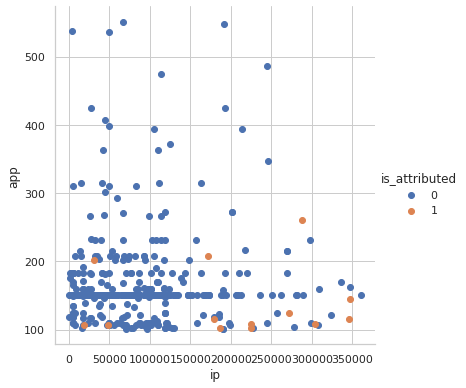

In [ ]:
import seaborn as sns

sns.set_style("whitegrid");
sns.FacetGrid(df, hue="is_attributed", size=5.5) \
   .map(plt.scatter, "ip", "app") \
   .add_legend();
plt.show();

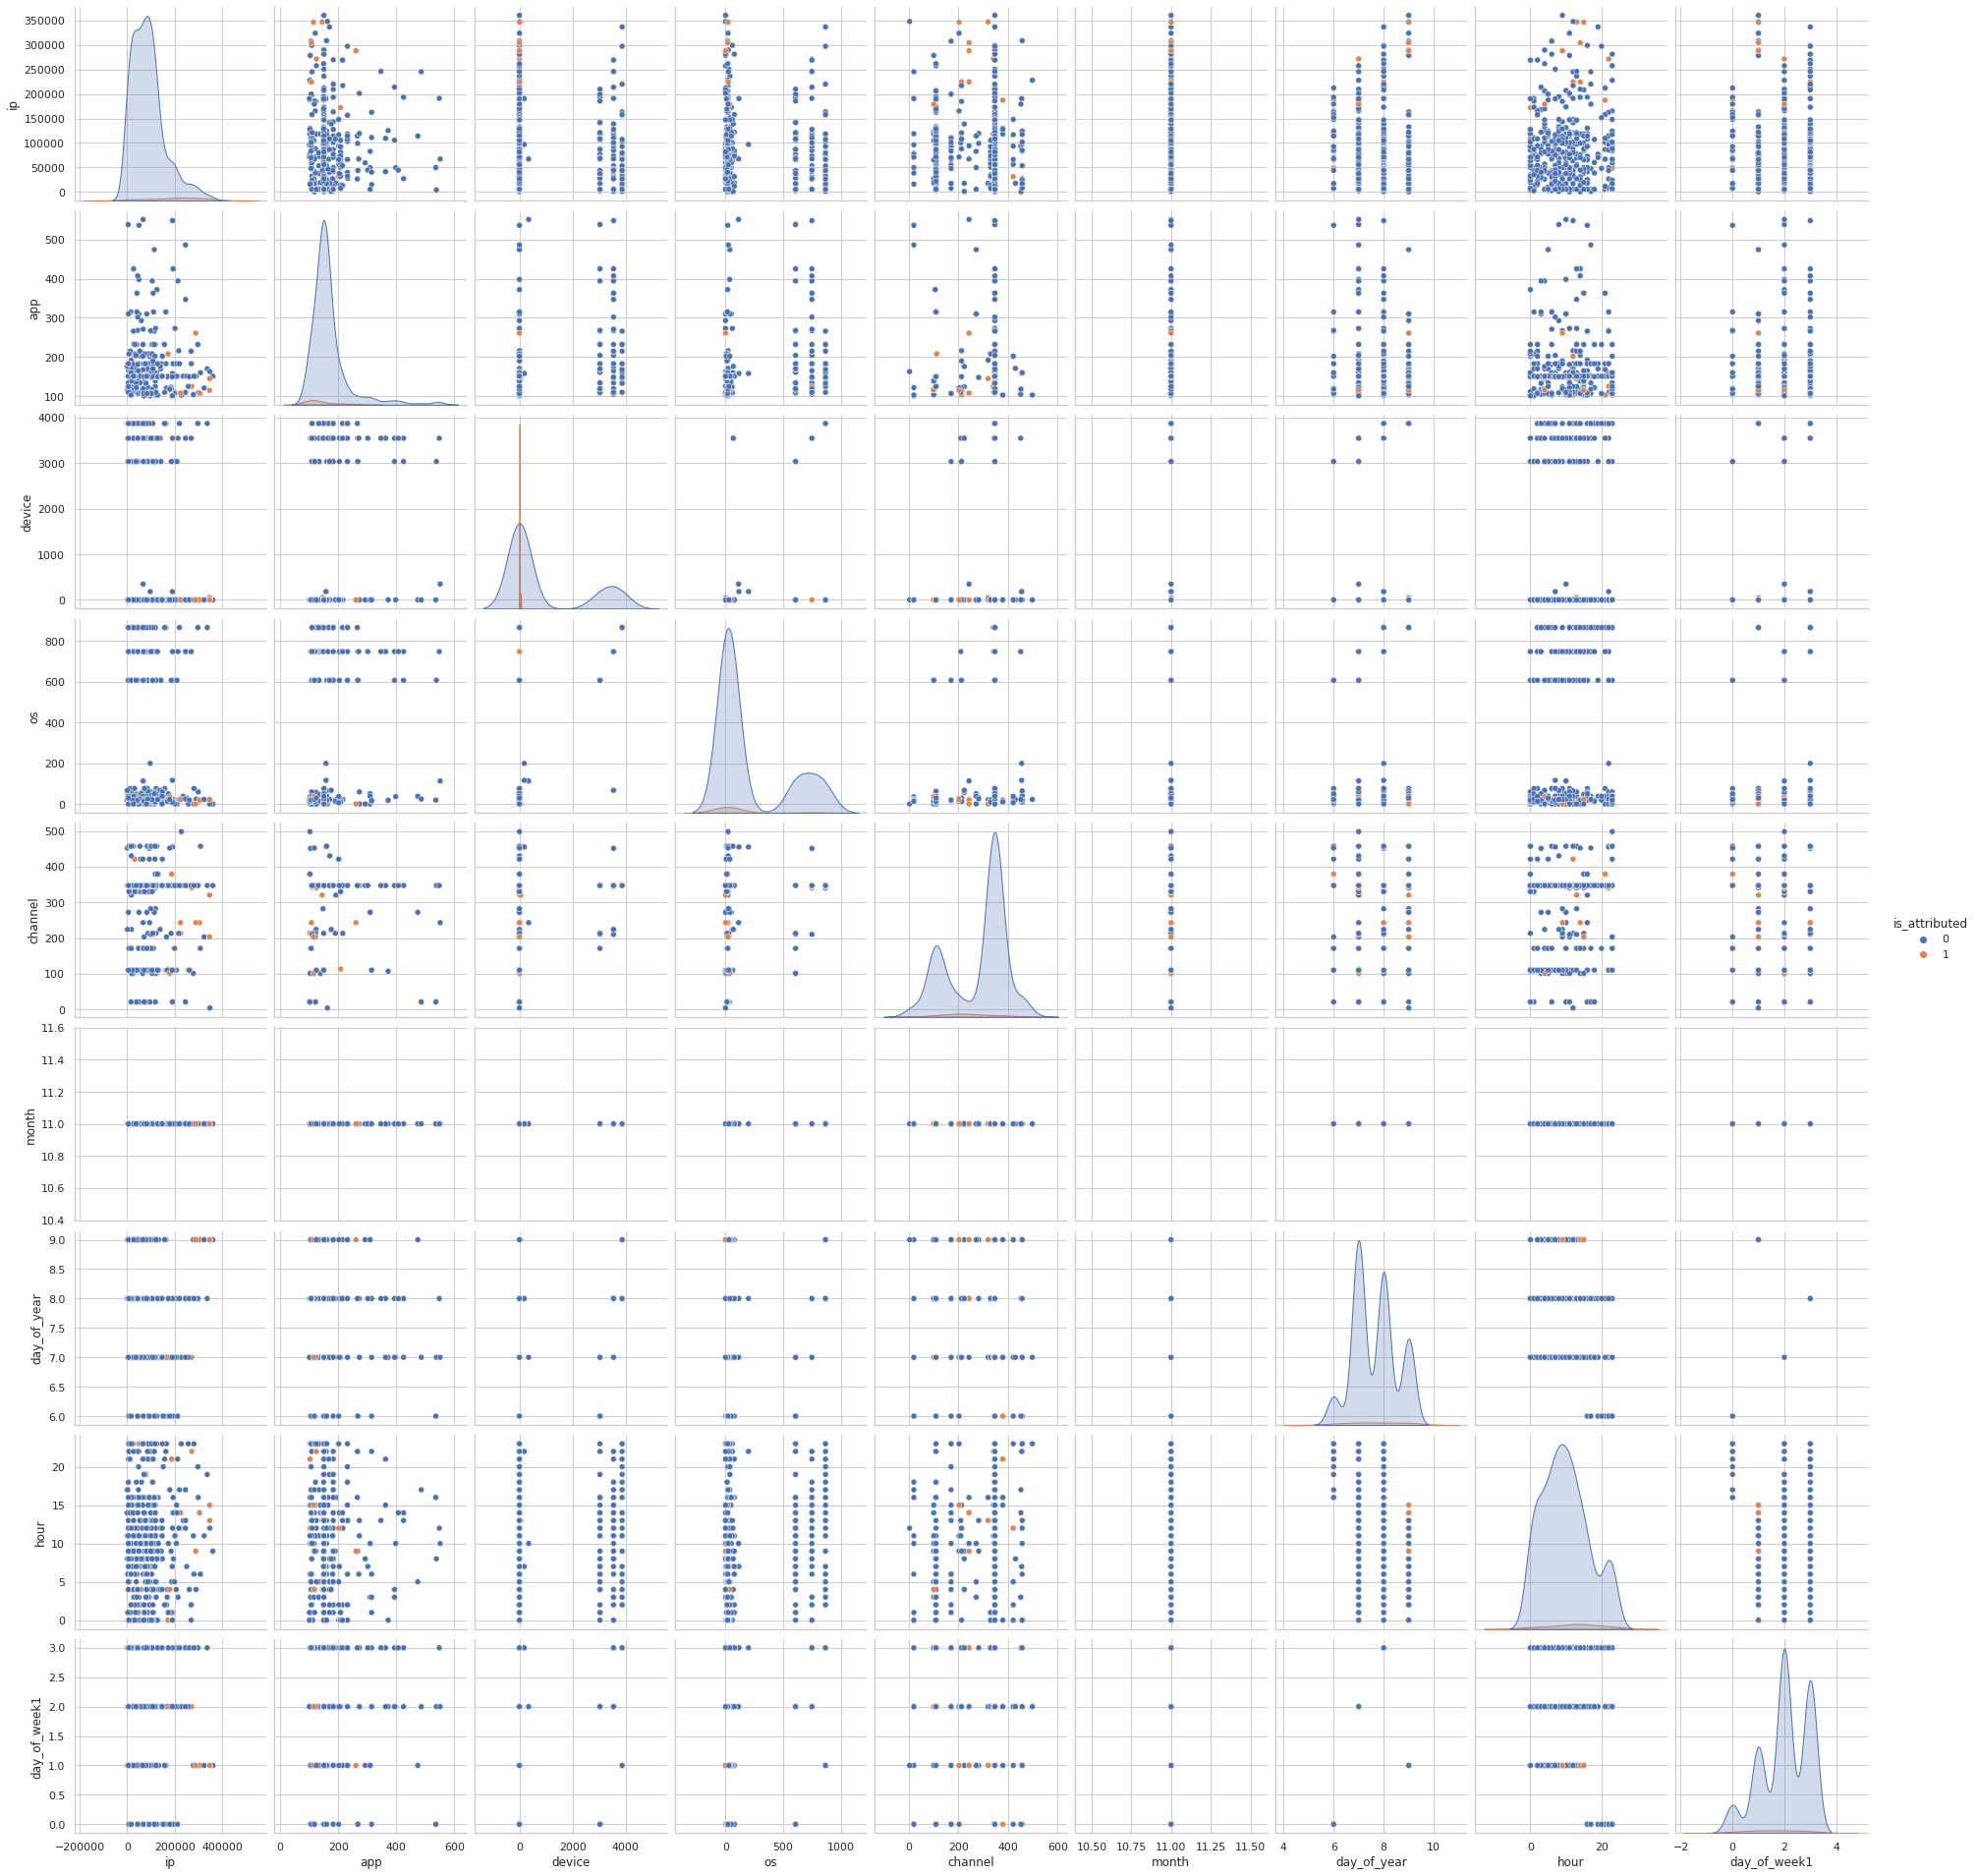

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="is_attributed", size=3);
plt.show()

In [ ]:
df.is_attributed.value_counts()

0    414
1     13
Name: is_attributed, dtype: int64

Text(0.5, 1.0, 'is_attributed')

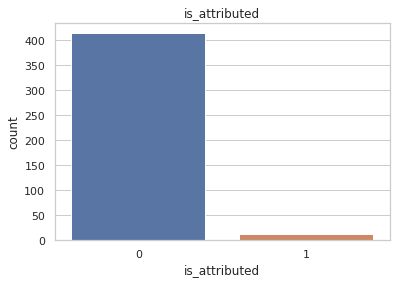

In [ ]:
sns.countplot('is_attributed',data = df)
plt.title("is_attributed")

In [ ]:
corr = df.corr()
corr

,ip,app,device,os,channel,is_attributed,month,day_of_year,hour,day_of_week1
ip,1.000000,0.014183,-0.039953,-0.023048,-0.050300,0.265618,NaN,0.052310,0.046410,-0.042622
app,0.014183,1.000000,0.259640,0.226790,0.107046,-0.073228,NaN,-0.032247,-0.016864,0.003283
device,-0.039953,0.259640,1.000000,0.941358,0.308533,-0.100962,NaN,0.066179,0.055247,0.086951
os,-0.023048,0.226790,0.941358,1.000000,0.311040,-0.075783,NaN,0.100573,0.089573,0.051760
channel,-0.050300,0.107046,0.308533,0.311040,1.000000,-0.053061,NaN,0.084572,0.217922,-0.119612
is_attributed,0.265618,-0.073228,-0.100962,-0.075783,-0.053061,1.000000,NaN,0.007027,0.066289,-0.078475
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_year,0.052310,-0.032247,0.066179,0.100573,0.084572,0.007027,NaN,1.000000,-0.244106,0.092621
hour,0.046410,-0.016864,0.055247,0.089573,0.217922,0.066289,NaN,-0.244106,1.000000,-0.210705
day_of_week1,-0.042622,0.003283,0.086951,0.051760,-0.119612,-0.078475,NaN,0.092621,-0.210705,1.000000


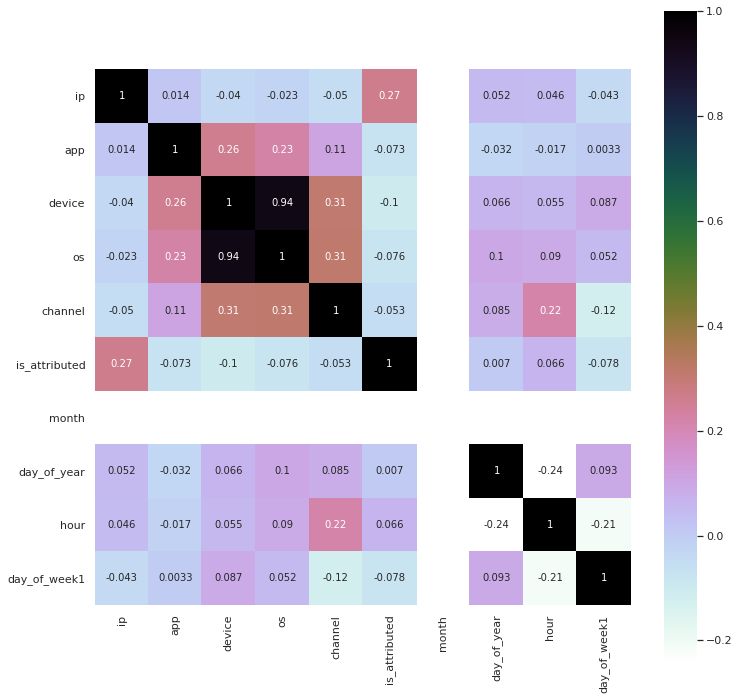

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
abs(corr['is_attributed'])[:5].sort_values(ascending = False)

ip         0.265618
device     0.100962
os         0.075783
app        0.073228
channel    0.053061
Name: is_attributed, dtype: float64

In [ ]:
df = df.select_dtypes(include=['float64','int64'])
df.head()

,ip,app,device,os,channel,is_attributed,month,day_of_year,hour,day_of_week1
497,7435,125,0,0,110,0,11,8,11,3
516,73516,204,3543,748,347,0,11,8,14,3
700,93620,202,1,22,421,0,11,7,12,2
1613,118383,103,1,13,379,0,11,9,15,1
2034,50474,208,1,19,330,0,11,7,1,2


# **5. Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable**

In [ ]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = df.drop(['is_attributed'], axis=1)
y = df['is_attributed']

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
import xgboost as xgb
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)


In [ ]:
xgbl = XGBClassifier( n_estimators=10)
xgbl = xgbl.fit(X_train, y_train)

test_pred = xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test, y_test)
print("The  Ensemble model accuracy is {}".format(xgbl_score))
print("The confusion matrix of XGB model is")
print(metrics.confusion_matrix(y_test,test_pred))
test_prob = xgbl.predict_proba(X_test)
print(test_prob[:10])

The  Ensemble model accuracy is 0.9883720930232558
The confusion matrix of XGB model is
[[85  0]
 [ 1  0]]
[[0.81044686 0.18955314]
 [0.81044686 0.18955314]
 [0.81044686 0.18955314]
 [0.81044686 0.18955314]
 [0.8058529  0.19414711]
 [0.8058529  0.19414711]
 [0.81044686 0.18955314]
 [0.81044686 0.18955314]
 [0.81044686 0.18955314]
 [0.8058529  0.19414711]]


Feature: 0, Score: 0.42084
Feature: 1, Score: 0.03419
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.54498
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


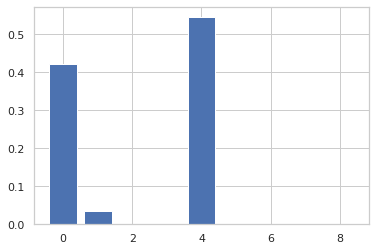

In [ ]:
# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = xgbl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
y_pred=xgbl.predict_proba(X_test)

In [ ]:
!pip install scikit-plot

# **6. Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data. NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.**

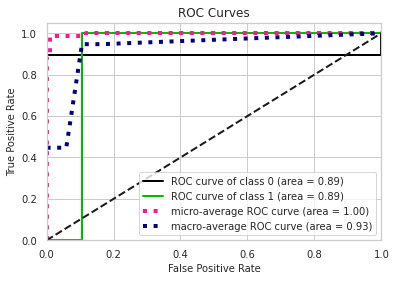

In [ ]:
import scikitplot as skp
import matplotlib.pyplot as plt

skp.metrics.plot_roc_curve(y_test,y_pred) #(actual/orginal labels, predicted labels)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier 

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9767441860465116
The confusion matrix of Bagging classifier model is
[[84  1]
 [ 1  0]]


# **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

In [ ]:
model = BaggingClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = bgcl.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: ignored

# **8. Compute feature importance score and name the top 5 features/column**

In [ ]:
test_prob = bgcl.predict_proba(X_test)
print(test_prob[:10])

[[1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


In [ ]:
y_predb=bgcl.predict_proba(X_test)

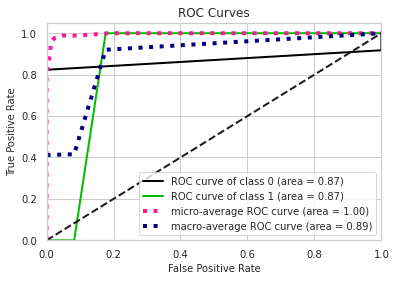

In [ ]:
skp.metrics.plot_roc_curve(y_test,y_predb) #(actual/orginal labels, predicted labels)
plt.show()

# **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.**

# **10.  On the basis of AUC/ROC score which one will you choose from BaggingClassifier and XGBoostClassifier and why?What does AUC/ROC score signifies?**

# **11.What is the accuracy for BaggingClassifier and XGBoostClassifier?()**

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_pred[:,1])
print("for XGB Classifier auc the score is",auc)

for XGB Classifier auc the score is 0.8941176470588235


In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,y_predb[:,1])
print("for baggingClassifier Classifier the auc score is",auc)

for baggingClassifier Classifier the auc score is 0.8705882352941177
